## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns
pd.show_versions()
import sys
import graphviz
sys.executable
#import graphviz


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.5.final.0
python-bits: 32
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: None.None

pandas: 0.24.0
pytest: None
pip: 18.1
setuptools: 39.0.1
Cython: None
numpy: 1.14.3
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.4.0
sphinx: None
patsy: 0.5.1
dateutil: 2.7.3
pytz: 2018.4
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 2.2.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: 4.2.5
bs4: None
html5lib: 1.0.1
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


'c:\\users\\rapp\\appdata\\local\\programs\\python\\python36-32\\python.exe'

In [2]:
data = [pd.read_csv('asos_snotel_UA_12hr_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_UA_df = pd.concat(data)
#asos_snotel_UA_df['LXV_WindSpeed_m/s']

#asos_snotel_UA_df.rename(columns={'LXV_WindSpeed_m/s': 'LXV_WindSpeed_mps'}, inplace=True)

asos_snotel_UA_df.astype('float16')
pd.set_option('display.expand_frame_repr', True)


print(asos_snotel_UA_df.keys())



Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC',
       ...
       'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc', 'KGJT_d300_200_dwpc',
       'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts',
       'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc',
       'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts'],
      dtype='object', length=163)


In [3]:
all_yrs = (asos_snotel_UA_df.index >= '01-01-2006') & (asos_snotel_UA_df.index < '01-01-2018')
variables = ['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', \
 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_CloudCover_oktas', 'LXV_12hr_delta_Pressure_hp', \
 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', \
 'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', \
 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', 'KGJT_300mb_speed_kts', \
 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', \
 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', \
 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', \
 'KGJT_850mb_height_m', 'KGJT_850mb_tmpc', 'KGJT_850mb_dwpc', 'KGJT_850mb_drct', 'KGJT_850mb_speed_kts', \
 'KGJT_d850_700_height_m', 'KGJT_d850_700_tmpc', 'KGJT_d850_700_dwpc', 'KGJT_d850_700_drct', 'KGJT_d850_700_speed_kts', \
 'KGJT_d850_500_height_m', 'KGJT_d850_500_tmpc', 'KGJT_d850_500_dwpc', 'KGJT_d850_500_drct', 'KGJT_d850_500_speed_kts', \
 'KGJT_d850_400_height_m', 'KGJT_d850_400_tmpc', 'KGJT_d850_400_dwpc', 'KGJT_d850_400_drct', 'KGJT_d850_400_speed_kts', \
 'KGJT_d850_300_height_m', 'KGJT_d850_300_tmpc', 'KGJT_d850_300_dwpc', 'KGJT_d850_300_drct', 'KGJT_d850_300_speed_kts', \
 'KGJT_d850_250_height_m', 'KGJT_d850_250_tmpc', 'KGJT_d850_250_dwpc', 'KGJT_d850_250_drct', 'KGJT_d850_250_speed_kts', \
 'KGJT_d850_200_height_m', 'KGJT_d850_200_tmpc', 'KGJT_d850_200_dwpc', 'KGJT_d850_200_drct', 'KGJT_d850_200_speed_kts',\
 'KGJT_d700_500_height_m', 'KGJT_d700_500_tmpc', 'KGJT_d700_500_dwpc', 'KGJT_d700_500_drct', 'KGJT_d700_500_speed_kts', \
 'KGJT_d700_400_height_m', 'KGJT_d700_400_tmpc', 'KGJT_d700_400_dwpc', 'KGJT_d700_400_drct', 'KGJT_d700_400_speed_kts', \
 'KGJT_d700_300_height_m', 'KGJT_d700_300_tmpc', 'KGJT_d700_300_dwpc', 'KGJT_d700_300_drct', 'KGJT_d700_300_speed_kts', \
 'KGJT_d700_250_height_m', 'KGJT_d700_250_tmpc', 'KGJT_d700_250_dwpc', 'KGJT_d700_250_drct', 'KGJT_d700_250_speed_kts', \
 'KGJT_d700_200_height_m', 'KGJT_d700_200_tmpc', 'KGJT_d700_200_dwpc', 'KGJT_d700_200_drct', 'KGJT_d700_200_speed_kts', \
 'KGJT_d500_400_height_m', 'KGJT_d500_400_tmpc', 'KGJT_d500_400_dwpc', 'KGJT_d500_400_drct', 'KGJT_d500_400_speed_kts', \
 'KGJT_d500_300_height_m', 'KGJT_d500_300_tmpc', 'KGJT_d500_300_dwpc', 'KGJT_d500_300_drct', 'KGJT_d500_300_speed_kts', \
 'KGJT_d500_250_height_m', 'KGJT_d500_250_tmpc', 'KGJT_d500_250_dwpc', 'KGJT_d500_250_drct', 'KGJT_d500_250_speed_kts', \
 'KGJT_d500_200_height_m', 'KGJT_d500_200_tmpc', 'KGJT_d500_200_dwpc', 'KGJT_d500_200_drct', 'KGJT_d500_200_speed_kts', \
 'KGJT_d400_300_height_m', 'KGJT_d400_300_tmpc', 'KGJT_d400_300_dwpc', 'KGJT_d400_300_drct', 'KGJT_d400_300_speed_kts', \
 'KGJT_d400_250_height_m', 'KGJT_d400_250_tmpc', 'KGJT_d400_250_dwpc', 'KGJT_d400_250_drct', 'KGJT_d400_250_speed_kts', \
 'KGJT_d400_200_height_m', 'KGJT_d400_200_tmpc', 'KGJT_d400_200_dwpc', 'KGJT_d400_200_drct', 'KGJT_d400_200_speed_kts', \
 'KGJT_d300_250_height_m', 'KGJT_d300_250_tmpc', 'KGJT_d300_250_dwpc', 'KGJT_d300_250_drct', 'KGJT_d300_250_speed_kts', \
 'KGJT_d300_200_height_m', 'KGJT_d300_200_tmpc', 'KGJT_d300_200_dwpc', 'KGJT_d300_200_drct', 'KGJT_d300_200_speed_kts', \
 'KGJT_d250_200_height_m', 'KGJT_d250_200_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_d250_200_drct', 'KGJT_d250_200_speed_kts']

good_vars = []
bad_vars = []
for var in variables:
    idx = np.isfinite(asos_snotel_UA_df[all_yrs]['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']) & np.isfinite(asos_snotel_UA_df[all_yrs][var])
    total_poss = len(asos_snotel_UA_df[all_yrs]['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'][asos_snotel_UA_df[all_yrs]['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']>=0])
    total_avail =len(asos_snotel_UA_df[all_yrs][idx])
    if total_avail/total_poss >= 0.67: 
        good_vars.append(var)
    else:
        bad_vars.append(var)
        
print('Variables with >= 67% data match to snowfall: ')
print(good_vars)
print('Variables with < 67% data match to snowfall: ')
print(bad_vars)

Variables with >= 67% data match to snowfall: 
['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_12hr_delta_Pressure_hp', 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', 'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', 'KGJT_300mb_speed_kts', 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', 'KGJT_850mb_height_m', 'KGJT_d850_700_height_m', 'KGJT_d850_500_height_

In [4]:
good_vars_snf =[]
filtered_asos_snotel_UA_df = pd.DataFrame()


good_vars_snf = good_vars + ['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']
print(good_vars_snf )
filtered_asos_snotel_UA_df=  asos_snotel_UA_df[good_vars_snf].copy()
test_train_df = asos_snotel_UA_df[good_vars_snf].dropna()


['CMtnSNTL_Temp_degC', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindSpeed_mps', 'LXV_WindDirection_deg', 'LXV_12hr_delta_Pressure_hp', 'KGJT_200mb_height_m', 'KGJT_200mb_tmpc', 'KGJT_200mb_dwpc', 'KGJT_200mb_drct', 'KGJT_200mb_speed_kts', 'KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts', 'KGJT_300mb_height_m', 'KGJT_300mb_tmpc', 'KGJT_300mb_dwpc', 'KGJT_300mb_drct', 'KGJT_300mb_speed_kts', 'KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts', 'KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts', 'KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts', 'KGJT_850mb_height_m', 'KGJT_d850_700_height_m', 'KGJT_d850_500_height_m', 'KGJT_d850_400_height_m', 'KGJT_d850_300_he

It is important to keep in mind that 'CMtnSNTL_12hr_SNWD_in contains snow depth info taken at the start of the respective 12hr period timestamp.  The snowfall calculated also gives the snowfall that fell in the 12hrs after the timestamp.  The OLS model will utilize hourly meteorological measurements at exactly 00:00 and 12:00 hours to predict the amount of snow which will fall in the next 12 hour period.  For example, the 00:00 meteorological measurements will be used to predict the snow which fell between 00:00 and 12:00.

# Now try Cross Validation using Timeseries split

In [5]:
#Create a lists of lists with best features for each test/train split set of interest such that
# best_features = [ [#Best Features of Surface Data only 2006,2017 test/2007-2016  train split], [#Best Features of Surface Data only 2006,2017 test/2006-2013,2015-2017 train split], \
# [Best Features of Surface+UA Data only 2006,2017 test/2007-2016  train split], [#Best Features of Surface+UA Data only 2006,2017 test/2006-2013,2015-2017 train split]
    
best_features =  ['LXV_12hr_delta_Pressure_hp', 'CMtn_Dewpoint_degC', 'CMtn_WindSpeed_mps'], \
                 ['LXV_12hr_delta_Pressure_hp', 'CMtn_Dewpoint_degC', 'CMtn_WindSpeed_mps'], \
                 ['LXV_12hr_delta_Pressure_hp', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_Dewpoint_degC'], \
                 ['LXV_12hr_delta_Pressure_hp',  'CMtn_WindSpeed_mps', 'CMtn_Dewpoint_degC'], \
                 ['KGJT_d400_250_dwpc', 'CMtnSNTL_Temp_degC', 'LXV_12hr_delta_Pressure_hp', 'KGJT_d400_200_dwpc', 'KGJT_700mb_drct', \
                     'KGJT_d500_300_drct', 'CMtn_Dewpoint_degC', 'KGJT_250mb_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_d300_250_drct', \
                     'KGJT_d400_200_tmpc', 'CMtn_WindSpeed_mps', 'KGJT_d500_400_height_m'], \
                  ['KGJT_d400_250_dwpc', 'CMtnSNTL_Temp_degC', 'LXV_12hr_delta_Pressure_hp', 'KGJT_d400_200_dwpc', \
                     'CMtn_Dewpoint_degC', 'KGJT_250mb_tmpc', 'KGJT_d250_200_dwpc', \
                     'KGJT_d400_200_tmpc', 'CMtn_WindSpeed_mps', 'KGJT_d500_400_height_m'], \ 

                 ['KGJT_d700_250_drct', 'KGJT_d400_300_drct', 'LXV_Temperature_degC', 'LXV_WindSpeed_mps', 'KGJT_400mb_drct', \
                      'KGJT_d300_200_dwpc', 'CMtnSNTL_Temp_degC', 'KGJT_d700_400_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_700mb_speed_kts', \
                      'KGJT_500mb_drct', 'KGJT_d250_200_tmpc', 'KGJT_d500_200_height_m', 'KGJT_d300_250_drct', 'CMtn_WindDirection_deg', \
                      'KGJT_d250_200_speed_kts', 'KGJT_250mb_drct', 'KGJT_400mb_dwpc', 'KGJT_d700_500_drct', 'CMtn_Dewpoint_degC'], \
                 ['LXV_Temperature_degC', 'LXV_WindSpeed_mps',  \
                      'KGJT_d300_200_dwpc', 'CMtnSNTL_Temp_degC', 'KGJT_d700_400_tmpc', 'KGJT_d250_200_dwpc', 'KGJT_700mb_speed_kts', \
                      KGJT_d250_200_tmpc', 'KGJT_d500_200_height_m', 'CMtn_WindDirection_deg', \
                      'KGJT_d250_200_speed_kts',  'KGJT_400mb_dwpc', 'CMtn_Dewpoint_degC']

  
descriptors = ['SFC_1617', 'SFC_1617_noWD', 'SFC_2014', 'SFC_2014_noWD','UASFC_1617', 'UASFC_1617_noWD', 'UASFC_2014',  'UASFC_2014_noWD']
print(descriptors)

['SFC_1617', 'SFC_1617_noWD', 'SFC_2014', 'SFC_2014_noWD', 'UASFC_1617', 'UASFC_1617_noWD', 'UASFC_2014', 'UASFC_2014_noWD']


**Obtain feature data for each feature set in best_features, along with corresponding snowfall**

In [6]:

X_feat,Y_actsnf = [], []
X_dates = []

#Loop through each feature set in best_features
for bf in np.arange(0,len(best_features),1):               
  X_temp, Y_temp = [], []

  idx = []

                
  idx = np.isfinite(test_train_df['2006':'2017']['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in'])
  for v in best_features[bf]: 
    idx = idx  & np.isfinite(test_train_df['2006':'2017'][v])

  
  Y_temp= round(test_train_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']['2006':'2017'][idx],0)
  Y_actsnf.append(Y_temp.tolist())

  X_temp = test_train_df['2006':'2017'][best_features[bf]][idx].apply(lambda x: x.tolist(), axis=1)   # only want SFC variables 
  X_feat.append(X_temp.tolist())
  print(len(X_feat[bf]), len(Y_actsnf[bf]))
 
  #Need the timestamps which corresponds to each feature list generated above for some histogram plots
  X_dates.append(test_train_df['2006':'2017'][idx].index.tolist())          #.apply(lambda x: x.tolist(), axis=1)


213 213
213 213
213 213
213 213
213 213
213 213
213 213
213 213


**Define our test/train folds using KFold**

In [7]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
lm = linear_model.LinearRegression()

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error
from sklearn import metrics


kfcv = KFold(n_splits=5, shuffle = True, random_state = 5)
print(kfcv)  

for train_index, test_index in kfcv.split(X_feat[0]):
  print("TRAIN:", train_index, "TEST:", test_index)


KFold(n_splits=5, random_state=5, shuffle=True)
TRAIN: [  0   1   2   4   5   7   8   9  10  11  12  13  14  15  16  18  19  20
  22  23  24  27  29  30  31  32  33  35  36  38  39  40  41  43  44  45
  47  49  50  51  52  56  57  58  59  60  62  63  64  65  66  67  68  69
  70  71  72  73  75  76  77  78  79  80  81  82  83  85  86  88  89  90
  91  92  94  95  96  97  98  99 100 103 104 105 106 107 108 109 110 111
 112 113 114 115 118 120 121 123 124 125 126 128 129 131 132 133 135 136
 137 138 139 140 141 143 144 146 147 148 149 150 151 152 153 155 156 157
 158 159 161 162 164 165 166 167 168 169 170 172 173 174 175 176 177 178
 179 180 181 182 185 186 188 189 190 191 193 194 195 196 198 199 200 202
 203 204 205 206 208 209 211 212] TEST: [  3   6  17  21  25  26  28  34  37  42  46  48  53  54  55  61  74  84
  87  93 101 102 116 117 119 122 127 130 134 142 145 154 160 163 171 183
 184 187 192 197 201 207 210]
TRAIN: [  0   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17 

In [30]:
import numpy as np
from sklearn import datasets
boston = datasets.load_boston()
which_betas = np.ones(13, dtype=bool)
which_betas[3] = False  # Eliminate dummy variable
X = boston.data[:, which_betas]
y = boston.target

print(X)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

NameError: name 'sklearn' is not defined

In [87]:
from sklearn.model_selection import TimeSeriesSplit # import KFold
from sklearn.model_selection import KFold # import KFold

from scipy.stats import pearsonr, linregress
from sklearn.metrics import mean_squared_error
from regressors import stats

model = lm  #lm.fit(X_train, Y_train)
 #Y_predsnf = lm.predict(X_test)

slopes, intercepts, r_values, p_values, std_errs, mses, rmses = [],[],[],[],[], [], [] 
R2_scores, accuracys =[], []
maes, mpes, mapes = [], [], []
all_Ytest_predictions, all_Ytests = [], []
all_Ytest_predictions_arrays, all_Ytests_arrays = [],[]
Ytest_predictions = []    


#Loop through
for f in np.arange(0,len(X_feat),1):
 

  
 Ytest_predictions.append(cross_val_predict(model, X_feat[f], Y_actsnf[f], cv = kfcv))
 accuracys.append(cross_val_score(model, X_feat[f], Y_actsnf[f], cv = kfcv, scoring='neg_mean_squared_error'))
 #print(Ytest_predictions)



    
 R2_scores.append(metrics.r2_score( Y_actsnf[f],Ytest_predictions[f],))
 slope, intercept, r_value, p_value, std_err = linregress(Ytest_predictions[f], Y_actsnf[f])    
 slopes.append(slope)
 intercepts.append(intercept)
 r_values.append(r_value)
 p_values.append(p_value)
 std_errs.append(std_err)
 mses.append(mean_squared_error(Ytest_predictions[f], Y_actsnf[f]))
 rmses.append(np.sqrt(mean_squared_error(Ytest_predictions[f], Y_actsnf[f])))
 all_Ytest_predictions_arrays.append(Ytest_predictions)   #creates list of arrays
 all_Ytests_arrays.append(Y_actsnf[f])   #creates list of arrays
 #print(str(R2_scores))
          

#Calculate Mean Absolute Error
 mae_sum = np.sum(abs(Y_actsnf[f]-Ytest_predictions[f]))
 maes.append(mae_sum/len(Y_actsnf[f]))

#Calculate Mean Absolute Percentage Error
 mape_sum = np.sum(abs((Y_actsnf[f]-Ytest_predictions[f])/Y_actsnf[f]))
 mapes.append(mape_sum/len(Y_actsnf[f]))

#Calcluate Mean Percentage Error
 mpe_sum = np.sum((Y_actsnf[f]-Ytest_predictions[f])/Y_actsnf[f])
 mpes.append(mpe_sum/len(Y_actsnf[f]))        




 #print('Mean Cross Val R2 score: '+ str(R2_scores))
 #print('Mean RMSE:' + str(rmses))
#print(accuracys)
print(x.mean for x in accuracys) 
print([np.mean(x) for x in np.abs(accuracys)])
print(maes, mapes, mpes)
    
#all_Ytest_predictions = [val for sublist in  all_Ytest_predictions_arrays for val in sublist]   #flattens list of arrays into single list of values
#all_Ytests = [val for sublist in   all_Ytests_arrays for val in sublist]   #flattens list of arrays into single list of values




<generator object <genexpr> at 0x013110F0>
[4.501765184404621, 4.501765184404621, 4.494714764785766, 4.678250455808613, 4.297241336203473, 4.338841256616616, 4.6331723792204205, 4.519785141633451]
[1.50880811215547, 1.50880811215547, 1.4995624844696636, 1.5341942041663676, 1.4918559462119616, 1.4856541970047816, 1.5853716277244008, 1.5108131184477716] [0.3312584502334144, 0.3312584502334144, 0.330400896358451, 0.33720609173247823, 0.3337993726310906, 0.3281696494911708, 0.36108658439629415, 0.33571084737341556] [-0.13624203723942288, -0.13624203723942288, -0.13607164292439677, -0.13380977672188743, -0.12608158599963265, -0.13481843595056672, -0.1465393694825244, -0.13611358641984864]


In [53]:

print(mae)
print(mape)
print(mpe)

<built-in method keys of dict object at 0x0E4898A0>


**Make some plots**

['SFC_1617', 'SFC_1617_noWD', 'SFC_2014', 'SFC_2014_noWD', 'UASFC_1617', 'UASFC_1617_noWD', 'UASFC_2014', 'UASFC_2014_noWD']
SFC_1617
SFC_1617_noWD
SFC_2014
SFC_2014_noWD
UASFC_1617
UASFC_1617_noWD
UASFC_2014
UASFC_2014_noWD
| Model Data      |   R Squared |      p vaue |    RMSE |
|-----------------|-------------|-------------|---------|
| SFC_1617        |   0.0439705 | 0.00209366  | 2.11972 |
| SFC_1617_noWD   |   0.0439705 | 0.00209366  | 2.11972 |
| SFC_2014        |   0.0470133 | 0.00145353  | 2.11823 |
| SFC_2014_noWD   |   0.0296544 | 0.0118263   | 2.16121 |
| UASFC_1617      |   0.101441  | 2.08378e-06 | 2.07122 |
| UASFC_1617_noWD |   0.0820789 | 2.17634e-05 | 2.08085 |
| UASFC_2014      |   0.072515  | 6.86957e-05 | 2.1513  |
| UASFC_2014_noWD |   0.0676368 | 0.000123259 | 2.12434 |


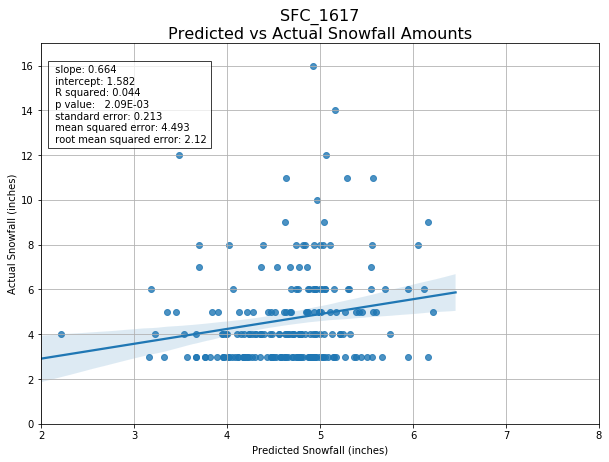

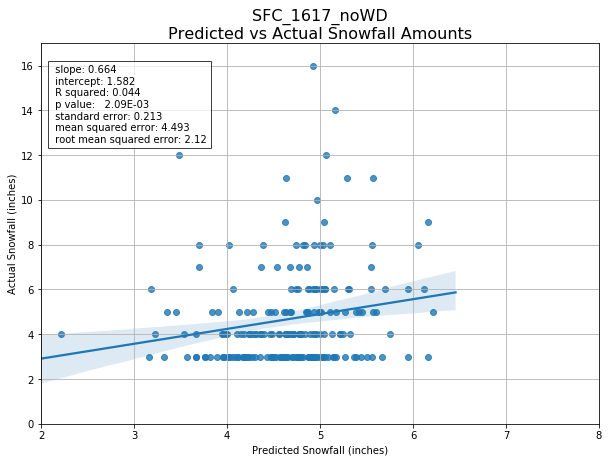

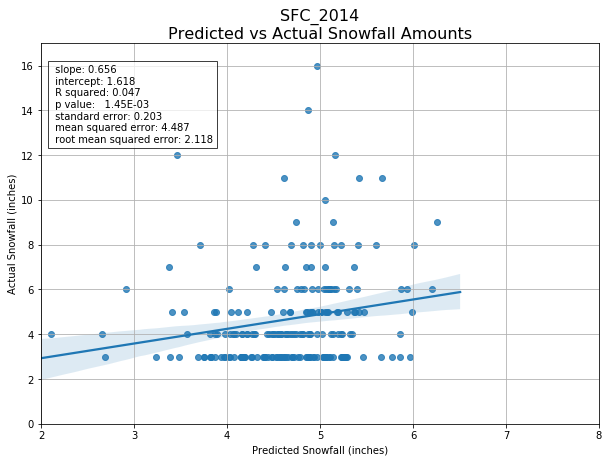

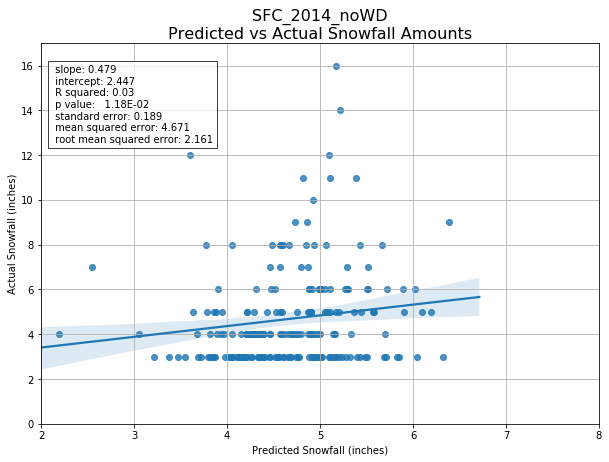

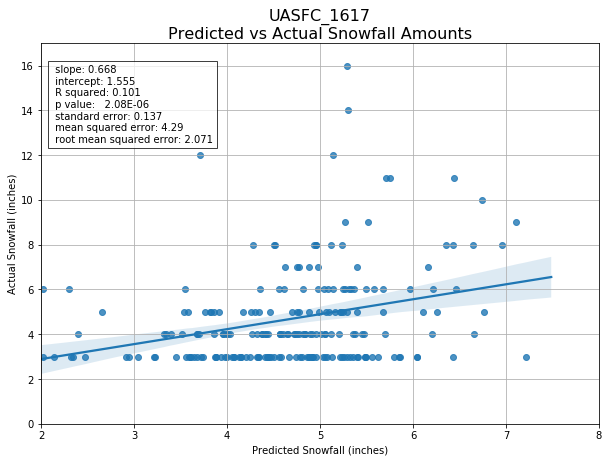

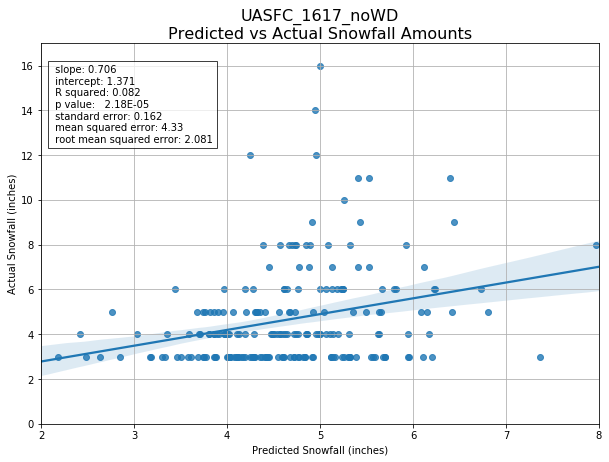

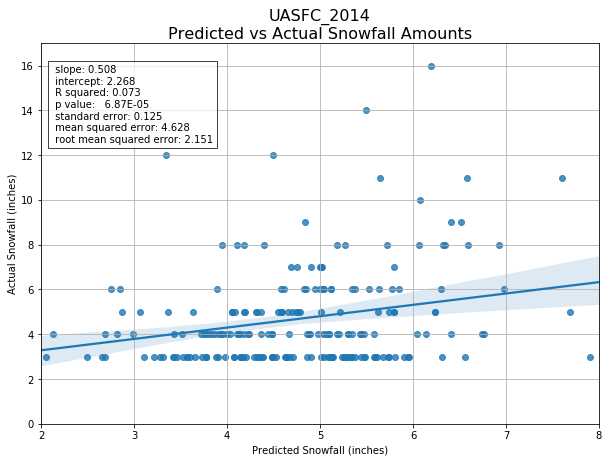

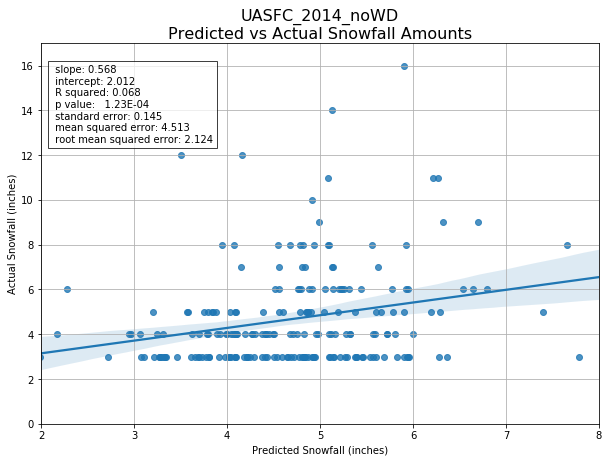

In [9]:
import regressors
print(descriptors)
for pred_case in np.arange(0, len(Ytest_predictions), 1):
    print(descriptors[pred_case])
    fig = plt.figure(figsize=(10,7))
    sns.regplot(Ytest_predictions[pred_case], Y_actsnf[pred_case])
    
    
    bbox_props=dict(facecolor='red', alpha=0.75, fc = 'white')
    plt.annotate(' slope: ' + str(round(slopes[pred_case],3)) +
                 '\n intercept: ' + str(round(intercepts[pred_case],3)) + 
                 '\n R squared: ' + str(round(r_values[pred_case]**2,3)) +  
                 '\n p value: ' +  str(format(p_values[pred_case], "10.2E")) + 
                 '\n standard error: ' + str(round(std_errs[pred_case],3)) +
                 '\n mean squared error: ' + str(round(mses[pred_case],3)) +
                 '\n root mean squared error: ' + str(round(rmses[pred_case],3)), \
                 xy=(0.02, 0.74), xycoords='axes fraction', fontsize=10, bbox = bbox_props)

    plt.xlabel('Predicted Snowfall (inches)')
    plt.ylabel('Actual Snowfall (inches)')
    plt.xlim([2,8])
    plt.ylim([0,17])
    plt.grid(True)
    plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/pred_vs_act_KFold_'+descriptors[pred_case]+'.png',bbox_inches='tight')
    plt.title(descriptors[pred_case]+'\nPredicted vs Actual Snowfall Amounts', fontsize = 16)


from tabulate import tabulate
tbl = zip(descriptors, [i ** 2 for i in r_values], p_values, rmses )  
print(tabulate(tbl, headers=['Model Data', 'R Squared', "p vaue", 'RMSE'], tablefmt='github'))


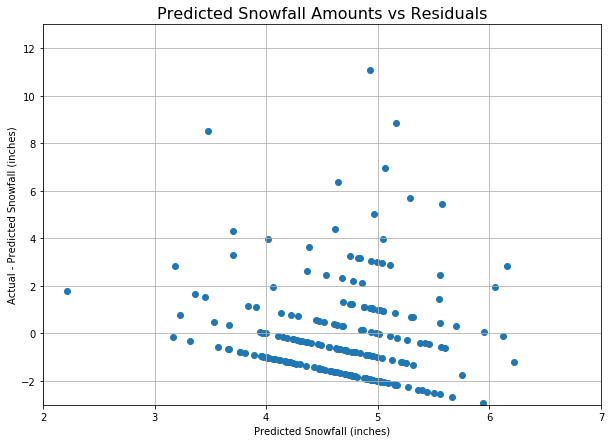

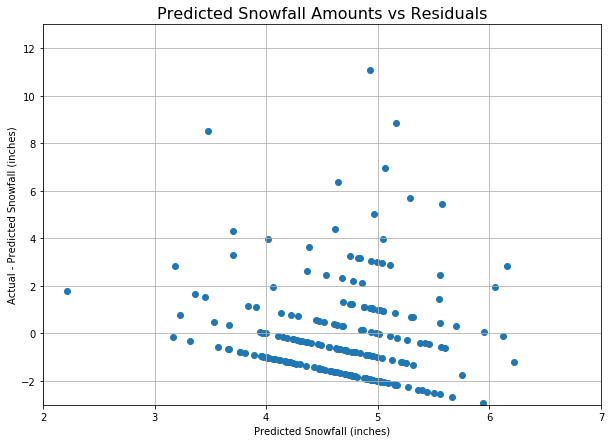

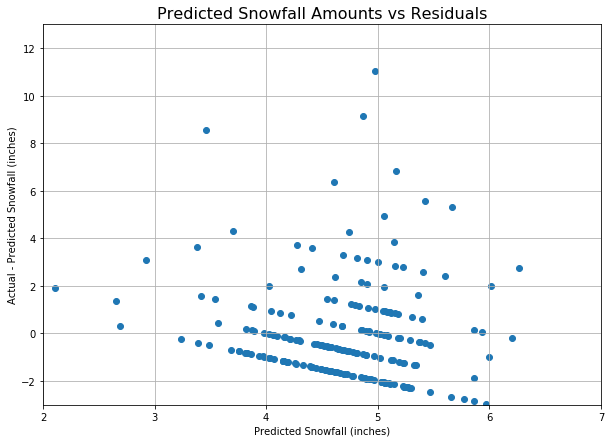

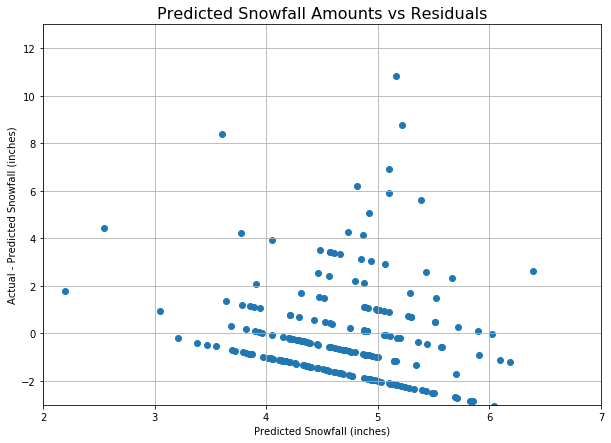

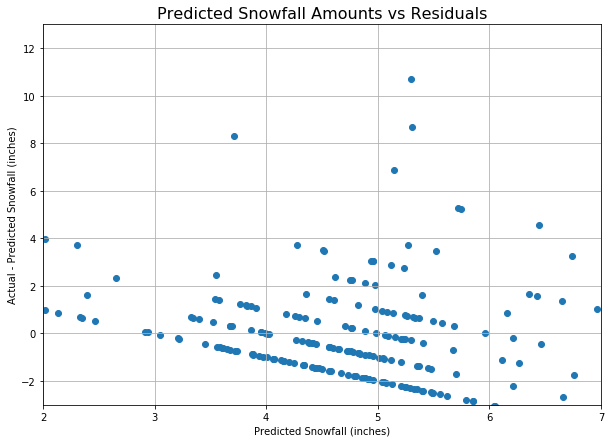

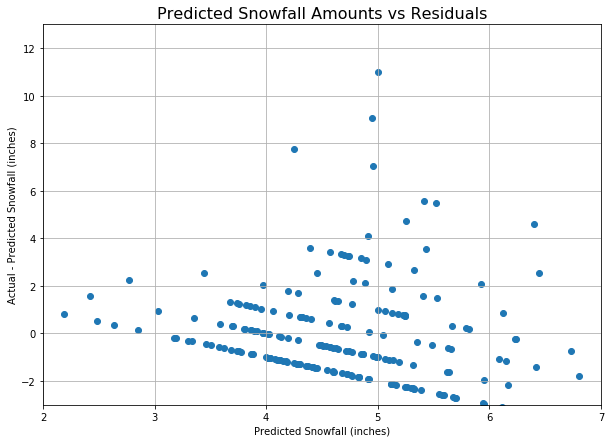

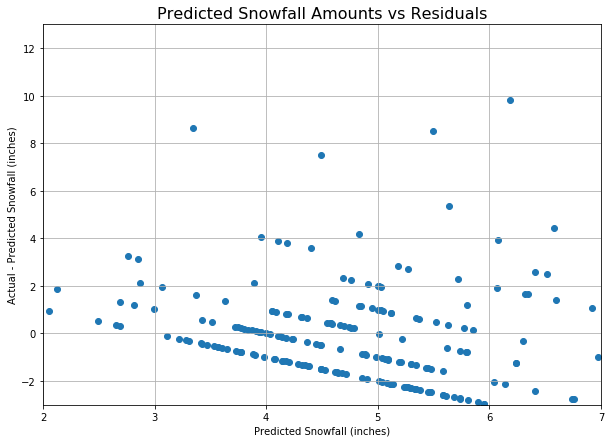

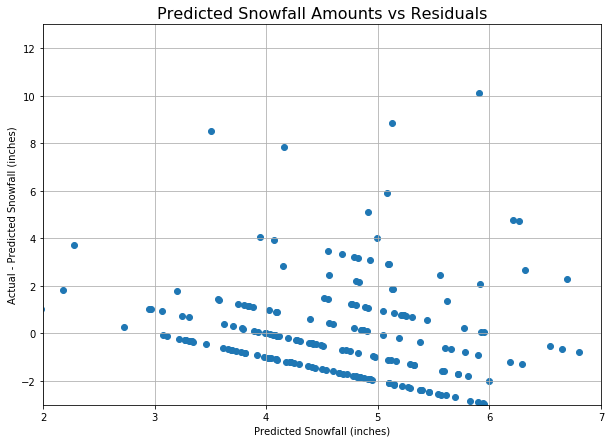

In [10]:
for pred_case in np.arange(0, len(Ytest_predictions), 1):
   fig = plt.figure(figsize=(10,7))

   plt.scatter(Ytest_predictions[pred_case], Y_actsnf[pred_case] - Ytest_predictions[pred_case])

   plt.ylabel('Actual - Predicted Snowfall (inches)')
   plt.xlabel('Predicted Snowfall (inches)')
   plt.xlim([2,7])
   plt.ylim([-3,13])
   plt.grid(True)
   plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/resid_vs_pred_KFold_'+descriptors[pred_case]+'.png',bbox_inches='tight')
   plt.title('Predicted Snowfall Amounts vs Residuals', fontsize = 16)
   

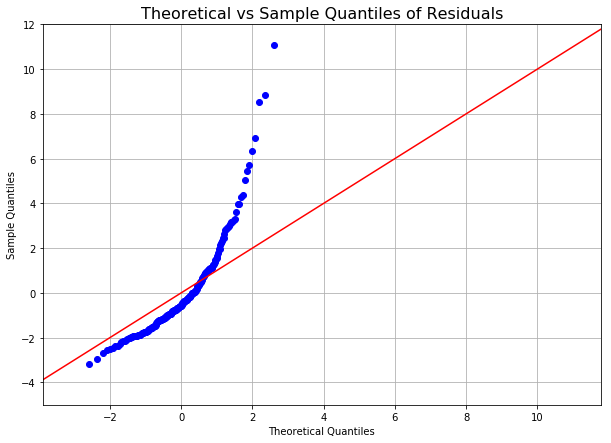

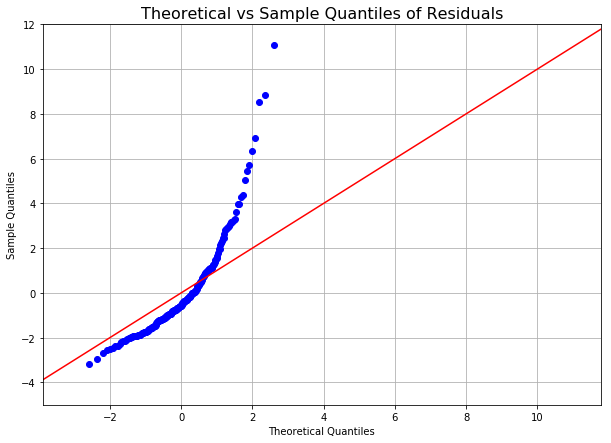

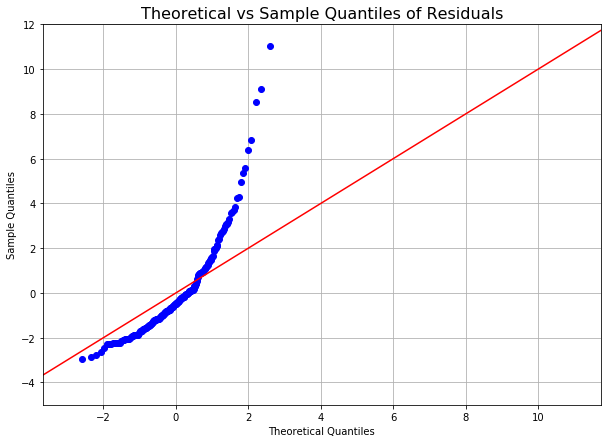

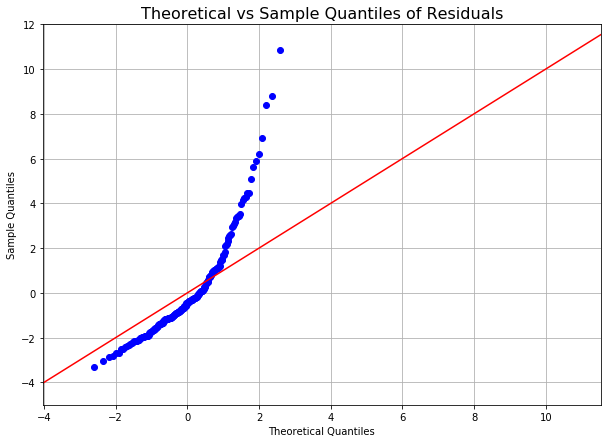

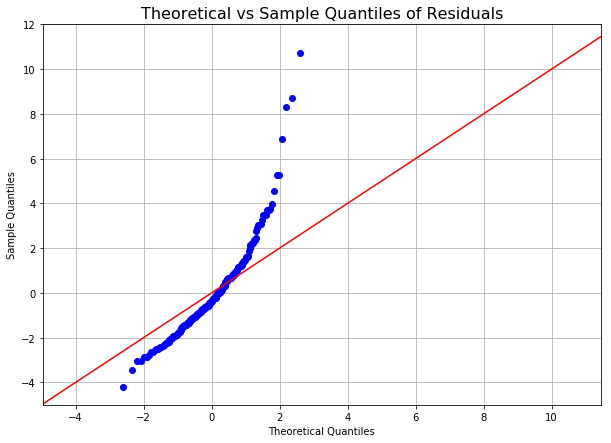

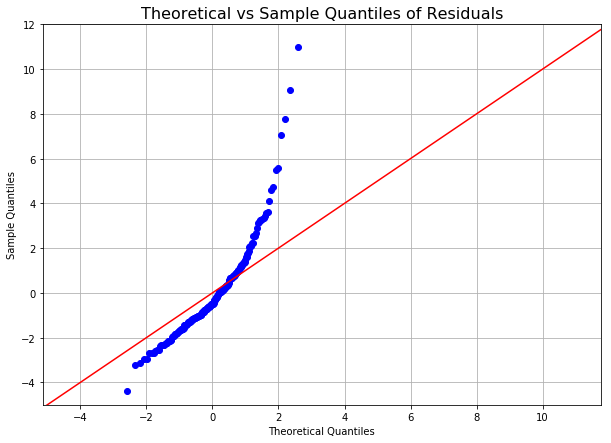

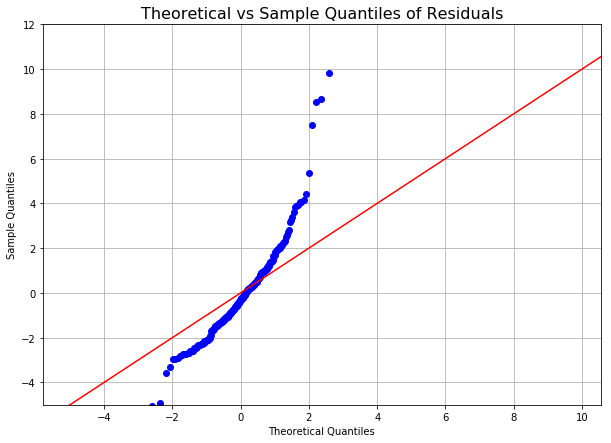

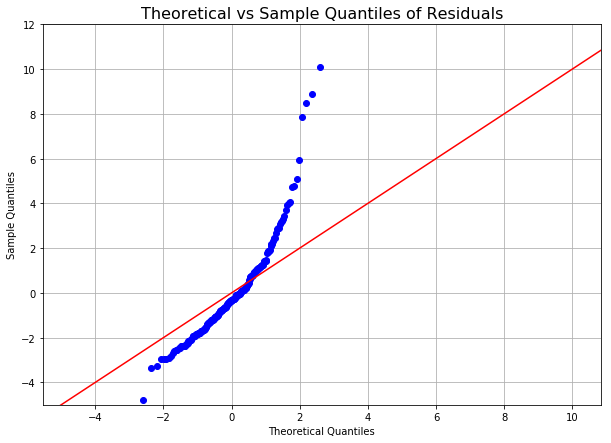

In [11]:
import statsmodels.api as sm
for pred_case in np.arange(0, len(Ytest_predictions), 1):
       residuals = Y_actsnf[pred_case] - Ytest_predictions[pred_case]
       fig, ax = plt.subplots(figsize=(10, 7))
       qq2=sm.qqplot(residuals, line='45', ax = ax)    
       plt.ylim([-5,12])

       plt.grid(True)
       plt.grid(True)
       plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/qq_resid_KFold_'+descriptors[pred_case]+'.png',bbox_inches='tight')
       plt.title('Theoretical vs Sample Quantiles of Residuals', fontsize = 16)

    

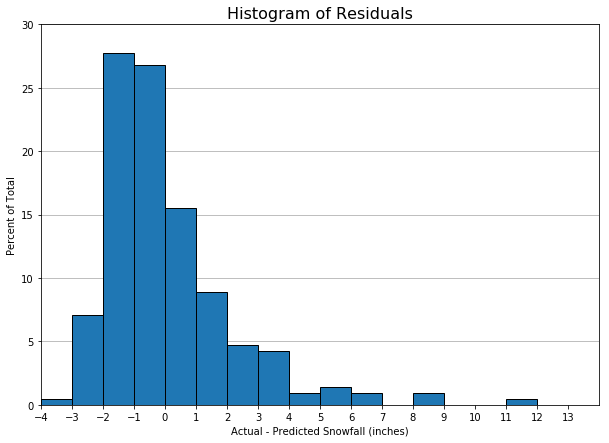

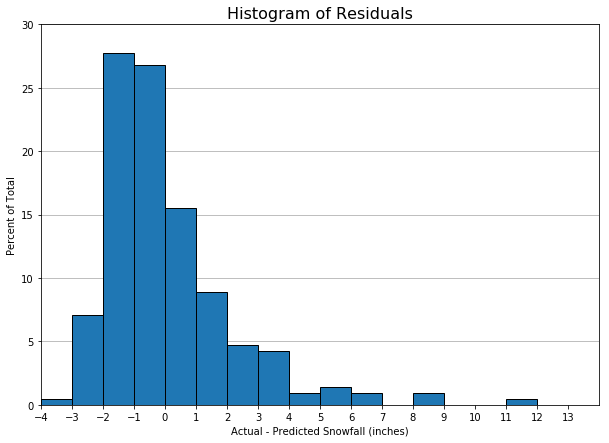

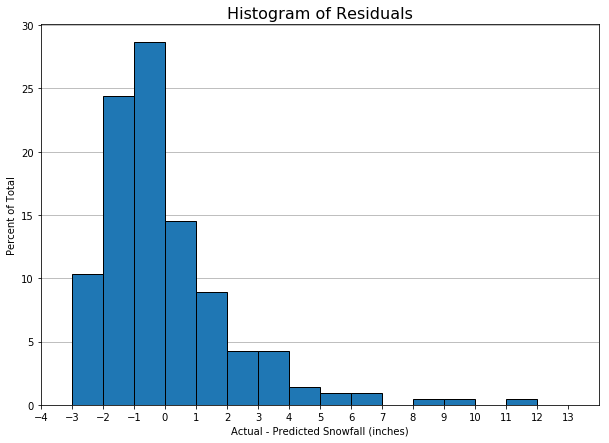

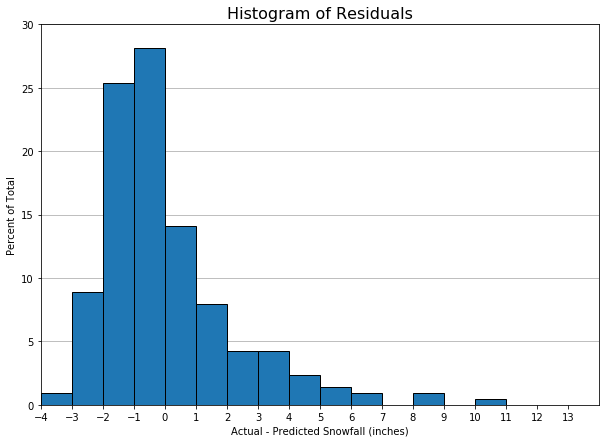

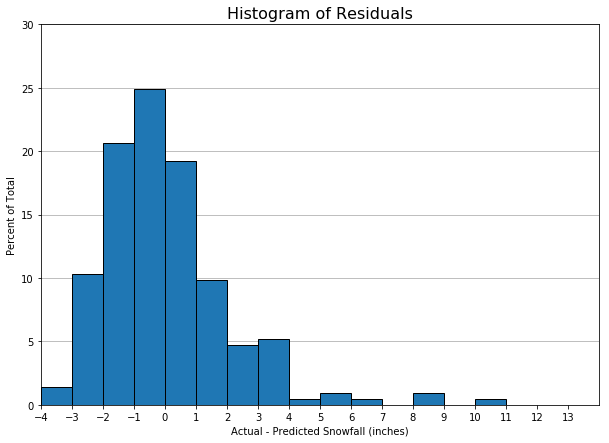

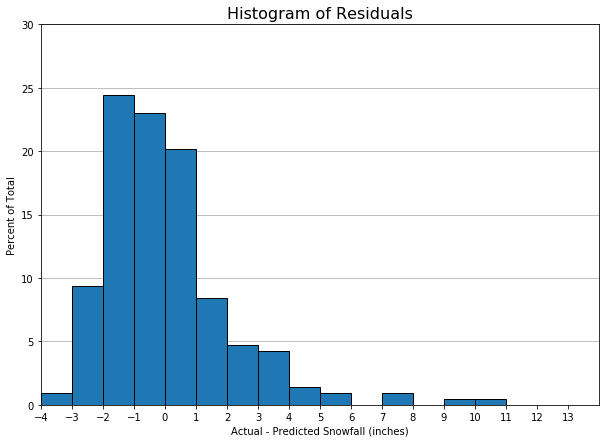

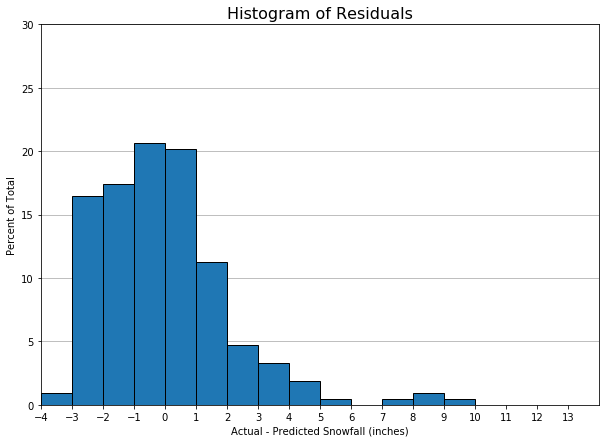

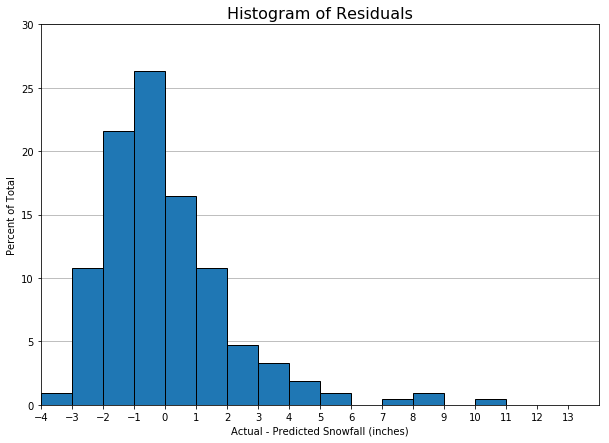

In [12]:
for pred_case in np.arange(0, len(Ytest_predictions), 1):
  diff =  Y_actsnf[pred_case] - Ytest_predictions[pred_case]

  fig = plt.figure(figsize=(10, 7))
  ax = plt.subplot(1,1,1)

  weights = np.ones_like(diff)/float(len(diff))
  plt.hist(diff, histtype = 'bar', weights=weights*100, \
           bins = np.arange(-4,14,1), align = 'mid', edgecolor = 'black') 

  plt.xlabel('Actual - Predicted Snowfall (inches)')
  plt.ylabel('Percent of Total')
  plt.xlim([-4,14])

  plt.xticks(np.arange(-4,14,1))
  plt.yticks(np.arange(0,31,5))
  ax.set_axisbelow(True)   #places gridlines behind bars
  plt.grid(True, axis = 'y')


  plt.title('', fontsize = 16)
  plt.savefig('C:/Users/RAPP/Documents/Capstone/Report/figs/hist_actual_minus_pred_KFold_'+descriptors[pred_case]+'.png',bbox_inches='tight')
  plt.title('Histogram of Residuals', fontsize = 16)



# Test climatology

In [13]:
 slopes, intercepts, r_values, p_values, std_errs, mses, rmses = [],[],[],[],[], [], [] 
 R2_scores =[]
 all_Ytest_predictions, all_Ytests = [], []
 all_Ytest_predictions_arrays, all_Ytests_arrays = [],[]
 Ytest_predictions = []    

 for f in np.arange(0,len(X_feat),1): 
  clim_snf = [4.7] * len(Y_actsnf[f])
  slope, intercept, r_value, p_value, std_err = linregress(clim_snf , Y_actsnf[f])
  slopes.append(slope)
  intercepts.append(intercept)
  r_values.append(r_value)
  p_values.append(p_value)
  std_errs.append(std_err)
  mses.append(mean_squared_error(clim_snf , Y_actsnf[f]))
  rmses.append(np.sqrt(mean_squared_error(clim_snf , Y_actsnf[f])))
  all_Ytest_predictions_arrays.append(Ytest_predictions)   #creates list of arrays
  all_Ytests_arrays.append(clim_snf )   #creates list of arrays
  
 print(p_values, rmses, std_errs)


[0.9999999999999961, 0.9999999999999961, 0.9999999999999961, 0.9999999999999961, 0.9999999999999961, 0.9999999999999961, 0.9999999999999961, 0.9999999999999961] [2.155427694124983, 2.155427694124983, 2.155427694124983, 2.155427694124983, 2.155427694124983, 2.155427694124983, 2.155427694124983, 2.155427694124983] [167047536278367.62, 167047536278367.62, 167047536278367.62, 167047536278367.62, 167047536278367.62, 167047536278367.62, 167047536278367.62, 167047536278367.62]


Text(0.5,1,'Predicted vs Actual Snowfall Amounts')

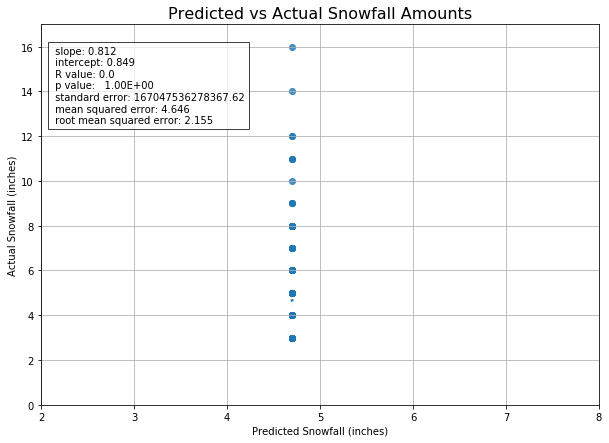

In [14]:
    fig = plt.figure(figsize=(10,7))
    sns.regplot(clim_snf, Y_actsnf[f])
    

    bbox_props=dict(facecolor='red', alpha=0.75, fc = 'white')
    plt.annotate(' slope: ' + str(round(slopes[pred_case],3)) +
                 '\n intercept: ' + str(round(intercepts[pred_case],3)) + 
                 '\n R value: ' + str(round(r_values[pred_case],3)) +  
                 '\n p value: ' +  str(format(p_values[pred_case], "10.2E")) + 
                 '\n standard error: ' + str(round(std_errs[pred_case],3)) +
                 '\n mean squared error: ' + str(round(mses[pred_case],3)) +
                 '\n root mean squared error: ' + str(round(rmses[pred_case],3)), \
                 xy=(0.02, 0.74), xycoords='axes fraction', fontsize=10, bbox = bbox_props)

    plt.xlabel('Predicted Snowfall (inches)')
    plt.ylabel('Actual Snowfall (inches)')
    plt.xlim([2,8])
    plt.ylim([0,17])
    plt.grid(True)
 
    plt.title('Predicted vs Actual Snowfall Amounts', fontsize = 16)
